8721


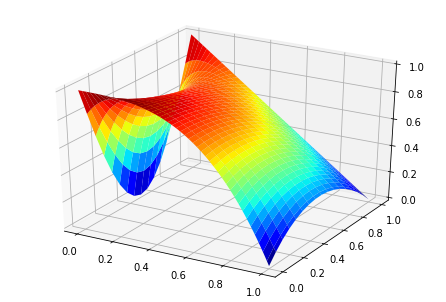

In [96]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import pandas as pd
import math
import pylab
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
a_x = 0
b_x = 1
a_t = 0
b_t = 1
N_x = 16
N_t = 2*(N_x**2)
h_x = (b_x - a_x) / N_x
h_t = (b_t - a_t) / N_t
def f(t,x):
  return (t**3) * (x**0.5)

def PSI_0(t):
  return 1 - (t**3) 

def PSI_1(t):
  return 1 - t

def FI(x):
  return 1 - math.sin((math.pi)*x)

def w_h(i):
  return i * h_x

def w_t(j):
  return j * h_t


y = np.array([],float)
x = np.array([],float)
t = np.array([],float)
for i in range(0, N_t+1):
  for j in range(N_x+1):


    if i == 0:
      if j == 0:
        y = np.append(y, PSI_0(i*h_t))
        x = np.append(x, j*h_x) 
        t = np.append(t,i*h_t)
      if j == N_x:
        y = np.append(y, PSI_1(i*h_t))
        x = np.append(x, j*h_x)
        t = np.append(t,i*h_t) 
      if (j!=0) and (j!=N_x):
        y = np.append(y, FI(j*h_x))
        x = np.append(x,j*h_x)
        t = np.append(t,i*h_t)
      #print('1 строка',y)  


    if i > 0:
      if j == 0:
        y = np.append(y, PSI_0(i*h_t))
        x = np.append(x, j*h_x)  
        t = np.append(t,i*h_t) 
      if j == N_x:
        y = np.append(y, PSI_1(i*h_t))
        x = np.append(x, j*h_x)
        t = np.append(t,i*h_t) 
      if (j!=0) and (j!=N_x):
        param = len(y)
        
          
        #print(h_t * f((i-1)*h_t,j*h_x))
        #print((h_t / (h_x**2)) * (y[ param - N_x ] - 2 * y[ param - N_x - 1 ] + y[ param - N_x -2 ]))
        #print( param , N_x , 1 )
        y_n_plus_1 = h_t * f((i-1)*h_t,j*h_x) + (h_t / (h_x**2)) * (y[ param - N_x ] - 2 * y[ param - N_x - 1 ] + y[ param - N_x -2 ]) + y[ param - N_x - 1 ] 
        y = np.append(y, y_n_plus_1)
        x = np.append(x, j*h_x) 
        t = np.append(t,i*h_t) 
        #print(h_t * f(i*h_t,j*h_x) + (h_t / (h_x**2)) * (y[ param - N_x ] - 2 * y[ param - N_x - 1 ] + y[ param - N_x -2 ]))
      #print('остальные строки',y) 
print(len(y))
y = y.reshape(N_t+1, -1)
x = x.reshape(N_t+1, -1)
t = t.reshape(N_t+1, -1)
#print('y',y)
fig = pylab.figure()
axes = Axes3D(fig) 
axes.plot_surface(t, x,y , cmap  = cm.jet) 
pylab.show()

In [0]:
sigma = 0.6
matrix_A = np.array([0*i for i in range((N_x-1)**2)],float)
matrix_A = matrix_A.reshape(N_x-1,-1)
for i in range(N_x-1):
  for j in range(N_x-1):
    if i == j:
      matrix_A[i,i] = 1/h_t + ((2*sigma) / (h_x**2))
    if i == j-1:
      matrix_A[i,j] = -(sigma / h_x**2)
    if i == j+1:
      matrix_A[i,j] = -(sigma / h_x**2)

#print(matrix_A)

8721


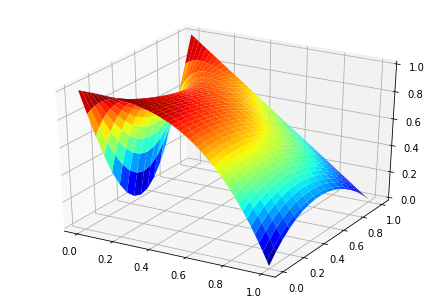

In [129]:

param = 0
F = np.array([0*i for i in range(1,N_x)],float)
rttt =0
y_new = np.array([],float)
x_new = np.array([],float)
t_new = np.array([],float)
for i in range(0, N_t+1):
  #A = np.array([],float)
  for j in range(N_x+1):
   
   
    if i == 0:
      if j == 0:
        y_new = np.append(y_new, PSI_0(i*h_t))
        x_new = np.append(x_new, j*h_x) 
        t_new = np.append(t_new,i*h_t)
      if j == N_x:
        y_new = np.append(y_new, PSI_1(i*h_t))
        x_new = np.append(x_new, j*h_x)
        t_new = np.append(t_new,i*h_t) 
      if (j!=0) and (j!=N_x):
        y_new = np.append(y_new, FI(j*h_x))
        x_new = np.append(x_new,j*h_x)
        t_new = np.append(t_new,i*h_t)
      #print('1 строка', len(y_new))  


    if i > 0:
      #rttt = rttt+1
      if j == 0:
        y_new = np.append(y_new, PSI_0(i*h_t))
        x_new = np.append(x_new, j*h_x)  
        t_new = np.append(t_new,i*h_t)
        #print('1 строка', len(y_new))
      param = len(y_new) + param_1
      if (j!=0) and (j!=N_x):
        
        x_new = np.append(x_new, j*h_x)
        t_new = np.append(t_new,i*h_t)
        if j == 1:
          #rttt = rttt+1
          F[j-1] = f((i-1)*h_t,j*h_x) + ( (1-sigma) / (h_x**2)) * (y_new[ param - N_x ] - 2 * y_new[ param - N_x - 1 ] + y_new[ param - N_x -2 ]) + ( 1 / h_t ) * y_new[ param - N_x - 1 ] + (sigma/h_x**2)* PSI_0(i*h_t)
          #param = param+1
          #print('1', F[j-1],j-1)
        if j == N_x-1:
          #rttt = rttt+1
          F[j-1] = f((i-1)*h_t,j*h_x) + ( (1-sigma) / (h_x**2)) * (y_new[ param - N_x ] - 2 * y_new[ param - N_x - 1 ] + y_new[ param - N_x -2 ]) + ( 1 / h_t ) * y_new[ param - N_x - 1 ] + (sigma/h_x**2)* PSI_1(i*h_t)
          #param = param+1
          #print('2', F[j-1],j-1)
        if (j!=1) and (j!=N_x-1):
          #param = param + 1
          #rttt = rttt+1
          
            
          #print(f((i-1)*h_t,j*h_x)*h_t , ( (1-sigma) / (h_x**2)) * (y_new[ param - N_x ] - 2 * y_new[ param - N_x - 1 ] + y_new[ param - N_x -2 ])*h_t ,  param ,N_x,1  )
          F[j-1] = f((i-1)*h_t,j*h_x) + ( (1-sigma) / (h_x**2)) * (y_new[ param - N_x ] - 2 * y_new[ param - N_x - 1 ] + y_new[ param - N_x -2 ]) + ( 1 / h_t ) * y_new[ param - N_x - 1 ] 
          #print('3', F[j-1],j-1)
        param_1 = param_1 + 1
      if j == N_x:
        c = np.linalg.solve(matrix_A,F)
        #print('первая',c)
        y_new = np.append(y_new, c)
        #print('вторая',y_new)
      if j == N_x:
        y_new = np.append(y_new, PSI_1(i*h_t))
        x_new = np.append(x_new, j*h_x)
        t_new = np.append(t_new,i*h_t)
  param_1=0
  #print(F)
  #print(rttt)
  #rttt=0
  

        
        #print(h_t * f(i*h_t,j*h_x) + (h_t / (h_x**2)) * (y[ param - N_x ] - 2 * y[ param - N_x - 1 ] + y[ param - N_x -2 ]))
      #print('остальные строки',y) 
print(len(y_new))
y_new = y_new.reshape(N_t+1, -1)
x_new = x_new.reshape(N_t+1, -1)
t_new = t_new.reshape(N_t+1, -1)
#print('y',y)
fig = pylab.figure()
axes = Axes3D(fig) 
axes.plot_surface(t_new, x_new,y_new , cmap  = cm.jet) 
pylab.show()

#print('проверка', y, '1234',y_new)

7.5828217896937575


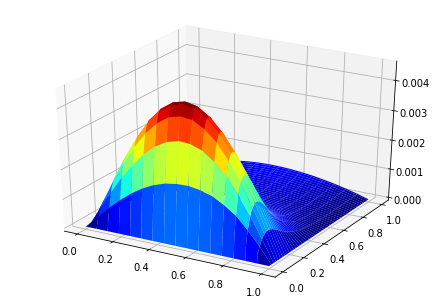

In [132]:
summa = 0
for i in range(N_t+1):
  for j in range(N_x+1):
    summa = summa +abs(y[i,j]-y_new[i,j])
    if abs(y[i,j]-y_new[i,j])>0.1:
      print(y[i,j],y_new[i,j],i,j)
print(summa)

fig = pylab.figure()
axes = Axes3D(fig) 
axes.plot_surface(x_new, t_new,abs(y_new - y) , cmap  = cm.jet) 
pylab.show()